<a href="https://colab.research.google.com/github/papillonsss-666/Nengo-Code-Example/blob/main/Neurons_of_Single_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurons of Single Cluster

In [1]:
!pip install nengo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 6.5 MB/s eta 0:00:00


In [2]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.dists import Choice
from nengo.processes import Piecewise
from nengo.utils.ensemble import response_curves, tuning_curves
from nengo.utils.ensemble import sorted_neurons
from nengo.utils.matplotlib import rasterplot

## Input Function

In [3]:
# Piecewise input
piecewise = Piecewise({0: 0, 0.2: 0.5, 1: 0, 2: -1, 3: 0, 4: 1, 5: 0})

In [4]:
piecewise = Piecewise({0: -1, 2.5: 1})

In [5]:
# Triangular Input
def triangle_input(t):
  if t <= 2.5:
    return t * 0.4
  else:
    return 0.4*(5 - t)

## Single cluster of neurons
This section includes code example of creating a cluster of neurons with similar tuning curves.

In [6]:
def plot_single_ens(input, t):
  model = nengo.Network()
  with model:
      # Input is a sin wave
      input = nengo.Node(input)

      # Our ensemble consists of 100 leaky integrate-and-fire neurons,
      # representing a one-dimensional signal
      single_cluster_ens = nengo.Ensemble(100, dimensions=1)
      single_cluster_ens.encoders = Choice([[1]])

      # Connect the input to the population
      nengo.Connection(input, single_cluster_ens, synapse=0.01)

      # Create probes to collect the data
      input_probe = nengo.Probe(input)
      single_cluster_ens_probe = nengo.Probe(single_cluster_ens, synapse=0.01) # 10ms delay in transmission
      single_cluster_ens_spike = nengo.Probe(single_cluster_ens.neurons)

  # Create simulator
  with nengo.Simulator(model) as sim:
    sim.run(t)

  # Plot tuning curve
  plt.plot(*tuning_curves(single_cluster_ens, sim))

  # Plot the decoded output of the ensemble
  plt.figure()
  plt.plot(sim.trange(), sim.data[single_cluster_ens_probe], label="Ensemble output")
  plt.plot(sim.trange(), sim.data[input_probe], "r", label="Input")
  plt.xlim(0, t)
  plt.title("Output Plot")
  plt.legend()

  # Plot the spiking output of the ensemble
  plt.figure()
  rasterplot(sim.trange(), sim.data[single_cluster_ens_spike])
  plt.title("Spike Plot (unsorted)")
  plt.xlim(0, t)

  # Sort the neurons
  # Code Reference: https://github.com/nengo/nengo/blob/bb8ce8f1646c626415bf2290fa8b6fa47e1a8916/nengo/utils/ensemble.py#L138
  indices = sorted_neurons(single_cluster_ens, sim, iterations=500)
  plt.figure()
  rasterplot(sim.trange(), sim.data[single_cluster_ens_spike][:, indices])
  plt.title("Spike Plot (sorted)")
  plt.xlim(0, t)



ERROR:nengo.cache:Decoder cache index corrupted. Reinitializing cache.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 462, in __enter__
    self._load_index_file()
  File "/usr/local/lib/python3.10/dist-packages/nengo/cache.py", line 385, in _load_index_file
    with self.index_path.open("rb") as f:
  File "/usr/lib/python3.10/pathlib.py", line 1119, in open
    return self._accessor.open(self, mode, buffering, encoding, errors,
FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/nengo/decoders/index'


HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

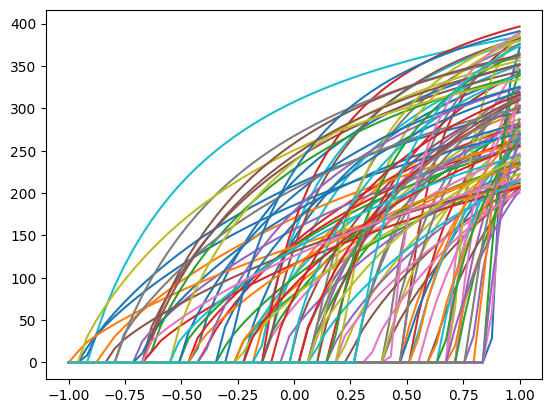

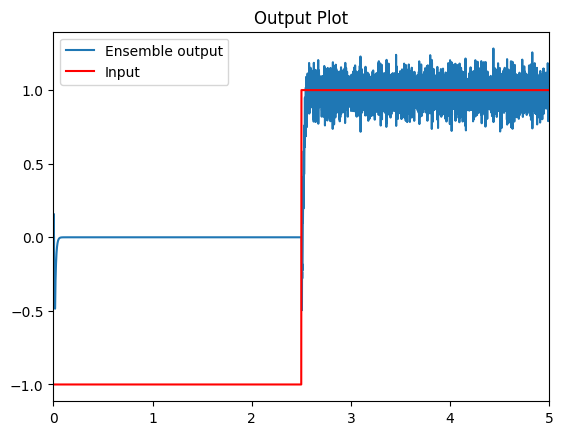

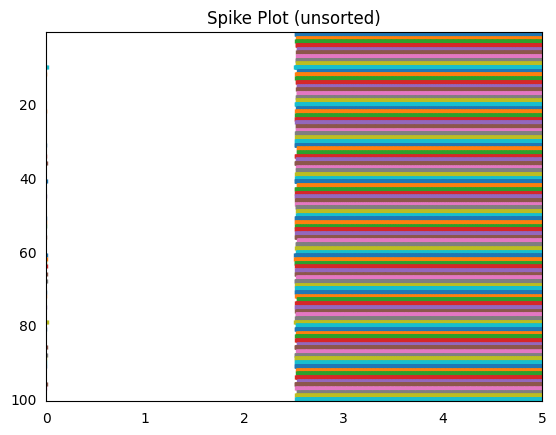

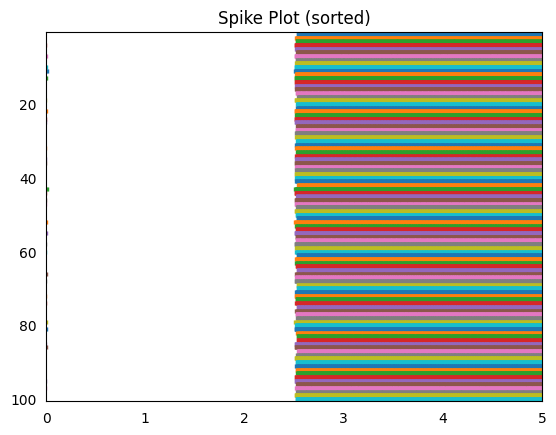

In [7]:
# Get the plots of piecewise functions
plot_single_ens(piecewise, 5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

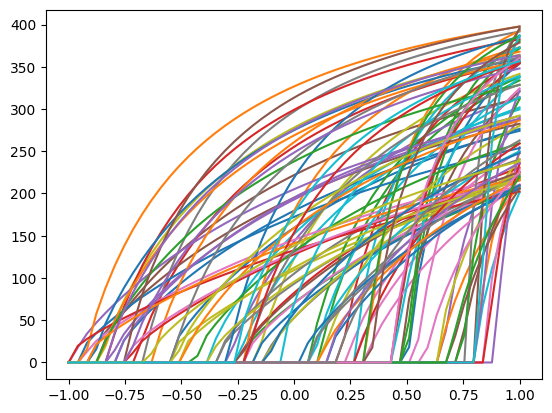

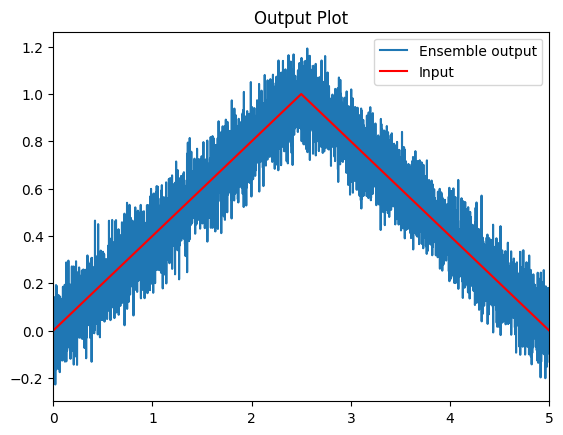

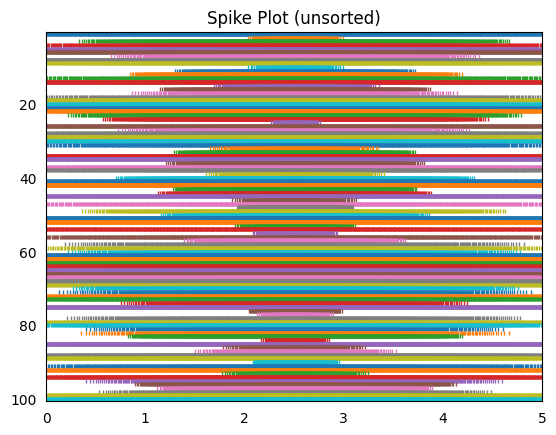

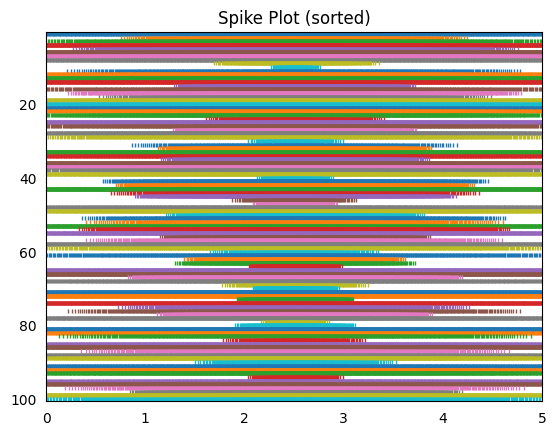

In [8]:
# Get the plots of triangular input
plot_single_ens(triangle_input, 5)